# Strapdown integration

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def draw_scale(ax, t_start_d, n_s, y_level, var_name='s', interval_length=1, axis_label=None):
    """Time inteval with ticks."""
    ax.plot([t_start_d, t_start_d+interval_length*n_s], [y_level, y_level], color='black', linewidth=1)
    for i in range(0,n_s+1):
        l = interval_length*i
        ax.plot([t_start_d+l, t_start_d+l], [y_level-0.1, y_level+0.1], color='black', linewidth=1)
        ax.text(t_start_d+l, y_level-0.2, f'${var_name}_{i}$', fontsize=12, ha='center')

    ax.plot()
    if axis_label:
        ax.text(0, y_level, axis_label, ha='right', va='center')


def draw_arrow_with_text(ax, height=0.1, t_start=1, t_end=2, label='$dq, dv$'):
    """ Horizontal arrow to indicate some time interval."""
    ax.text(0.5*(t_start+t_end), height, label, fontsize=9, ha='center', va='bottom')
    plt.annotate("", xy=(t_start, height), xytext=(t_end, height), arrowprops=dict(arrowstyle="<->", shrinkA=0.0, shrinkB=0.0) )


def draw_signal(n_time, label='$y_{acc}$', **kwargs):
    """Draw accelerometer signal for illustration. The signal is constant between i-1 and i."""
    np.random.seed(seed=6) # Random is good, with a seed it's better
    y_acc = 0.8*np.random.rand(n_time+1) +0.1
    t = np.arange(n_time+1)
    ax.step(t, y_acc, marker='.', **kwargs)
    ax.text(n_time+0.2, y_acc[-1], label, fontsize=12, ha='left', va='center')
    return

In [10]:
t_start_d+n_s

3

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:21: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HenkColleenNiamh\AppData\Local\Temp\ipykernel_1824\3397617914.py:20: SyntaxWarning: invalid escape sequence '\d'
  draw_arrow_with_text(ax, height=y_level_s-0.32, t_start=t_start_d+n_s+1, label='$\delta q_{2}, \delta v_{2}$')
C:\Users\HenkColleenNiamh\AppData\Local\Temp\ipykernel_1824\3397617914.py:21: SyntaxWarning: invalid escape sequence '\D'
  draw_arrow_with_text(ax, height=y_level_d -0.32, t_start=t_start_d+n_s, t_end=t_start_d+2*n_s, label='$\Delta q_{D1}, \Delta v_{D1}$')


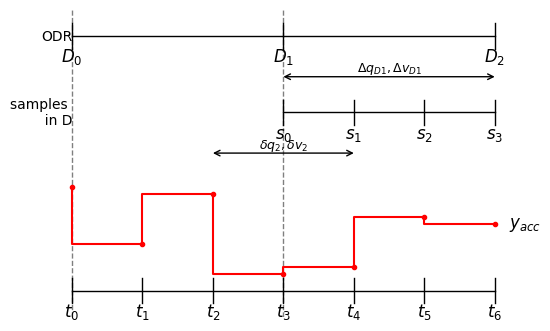

In [ ]:
# Settings.
n_time = 6
n_s = 3
t_start_d = 0
y_level_s = 1.4
y_level_d = 2



# Blank figure.
fig, ax = plt.subplots(figsize=(6, 4))
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)

draw_scale(ax, 0, n_time, 0, var_name='t')   # Main time axis.
draw_scale(ax, n_s, n_s, y_level_s, axis_label='samples \n  in D')  # Time in ODR.
draw_scale(ax, t_start_d, 2, y_level_d, interval_length=3, var_name='D', axis_label='ODR') # ODR interval.

draw_arrow_with_text(ax, height=y_level_s-0.32, t_start=t_start_d+n_s, label='$\delta q_{2}, \delta v_{2}$')
draw_arrow_with_text(ax, height=y_level_d -0.32, t_start=t_start_d+n_s, t_end=t_start_d+2*n_s, label='$\Delta q_{D1}, \Delta v_{D1}$')

for t in [t_start_d, t_start_d+n_s]:
    ax.axvline(t, linestyle='--', color='black', linewidth=1, alpha=0.5)


draw_signal(n_time, label='$y_{acc}$', color='red')
plt.savefig("./tex/images/strapdown_integration_timelines.png", dpi=300, bbox_inches='tight')